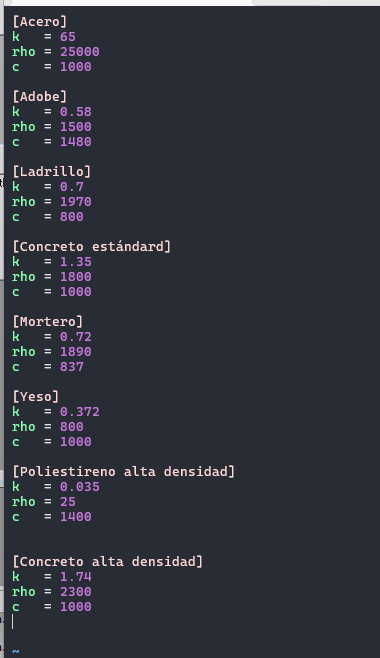

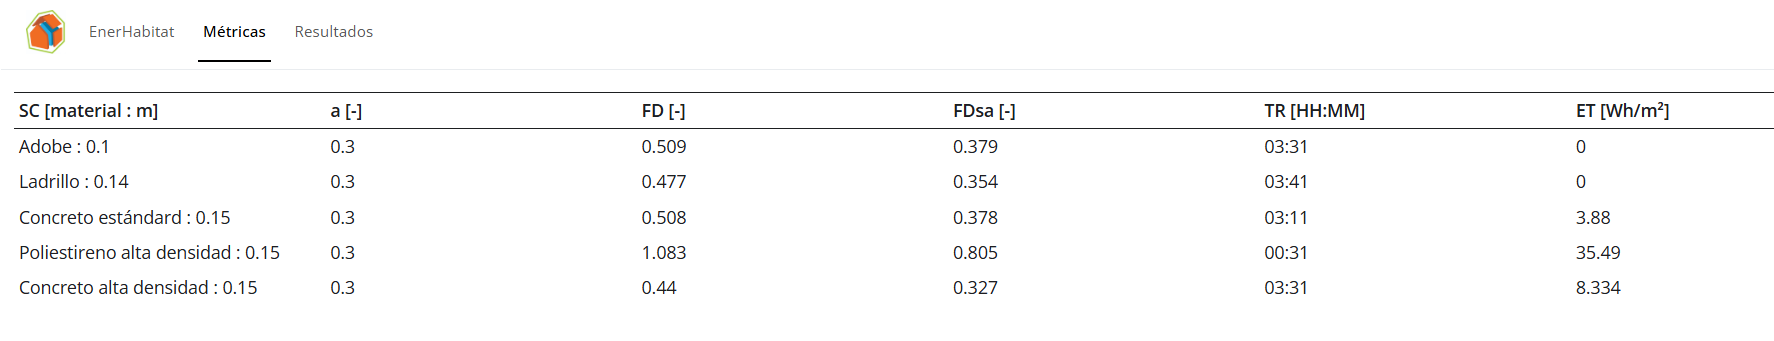

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from iertools.read import read_sql
import plotly.express as px


In [2]:
f = '../idf/validacion.sql'
ep = read_sql(f, alias=True).data
ep.reset_index(inplace=True)
ep

variable_name,date,Ti_CUBO,To
0,2025-05-15 00:01:00,31.529839,25.4
1,2025-05-15 00:02:00,31.516261,25.4
2,2025-05-15 00:03:00,31.502656,25.4
3,2025-05-15 00:04:00,31.489016,25.4
4,2025-05-15 00:05:00,31.475337,25.3
...,...,...,...
1435,2025-05-15 23:56:00,31.597378,25.5
1436,2025-05-15 23:57:00,31.583946,25.5
1437,2025-05-15 23:58:00,31.570483,25.5
1438,2025-05-15 23:59:00,31.556994,25.5


In [3]:
f = '../data/comparacion.csv'
eh = pd.read_csv(f,
                 index_col=0,
                 parse_dates=True,
                 usecols = ['Time', 'Tsa_1', 'Ti_1',"Ti_2","Ti_3","Ti_4","Ti_5"])
eh.index= eh.index.tz_localize(None)
eh.reset_index(inplace=True)
eh

,Time,Tsa_1,Ti_1
0,2025-05-15 00:00:00,25.5,31.4
1,2025-05-15 00:01:00,25.4,31.4
2,2025-05-15 00:02:00,25.4,31.4
3,2025-05-15 00:03:00,25.4,31.3
4,2025-05-15 00:04:00,25.4,31.3
...,...,...,...
1435,2025-05-15 23:55:00,25.6,31.5
1436,2025-05-15 23:56:00,25.5,31.4
1437,2025-05-15 23:57:00,25.5,31.4
1438,2025-05-15 23:58:00,25.5,31.4


In [ ]:
px.scatter(
    x = eh.Time,
    y = [eh.Ti_1,eh.Tsa_1,ep.Ti_CUBO]
)

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(eh.Tsa_1, label='Tsa')
#ax.plot(ep.To, label ='ep')
ax.plot(eh.Ti_1, label='eh')
ax.plot(ep.Ti_CUBO, label='ep')

ax.legend()
#ax.set_ylim(20,40)